## HW1
데이터셋의 크기가 1/10이 되었을때도 gradient descent를 이용한 linear regression이 잘 동작하는지 강의에서 배운 k-fold cross validation (k=5)을 활용해서 확인해보세요. 
그리고 데이터셋의 크기가 원래 사이즈였을 때도 똑같이 k-fold cross validation (k=5)를 진행해서 두 경우의 validation loss (k round의 평균 test loss)를 비교해보세요.

###참고사항
1.   위에 주어진 코드에서는 학습 방법에 초점이 맞춰져 test set이 따로 없었지만, 실제로 학습을 진행할때는 validation set이나 test set을 통해 성능을 확인하는 것이 필수적입니다!
2.   전체 데이터를 k개의 부분집합으로 나누기 위해서 아래와 같은 sklearn 라이브러리의 KFold 클래스를 사용해도 되지만,
```
from sklearn.model_selection import KFold
```
연습을 위해서 Lab 1-1에서 배운 Slicing을 통해서 데이터셋을 k개로 나누고
k round의 learning을 진행해주세요.





In [2]:
import torch
import torch.nn as nn
import numpy as np


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for idx,s in enumerate(text):
    if idx%10==0:
      data = s.split()
      x_data.append(float(data[0]))
      y_data.append(float(data[1]))    

# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

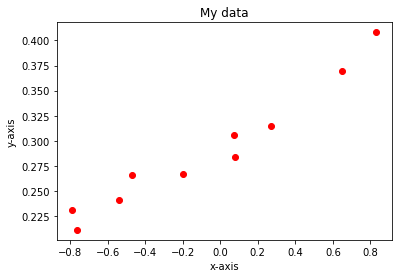

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

### Gradient Descent로 Linear Regression (K-fold cross validation)

In [16]:
# data shaping
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)

(10, 1) (10, 1)


In [17]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
K=5
n_over_k = int(len(x_data)/K)

val_losses = [] # array for saving validation losses

for k in range(K):
  # Linear regression model, y = Wx+b
  model = nn.Linear(input_size, output_size) 

  # Loss and optimizer
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
  
  # training / validation partition of the k-th round
  # np.delete 함수에 slice를 넘겨주면 해당 axis의 해당 인덱스들을 array에서 제거
  x_train = np.delete(x_data, slice(k*n_over_k,(k+1)*n_over_k), axis=0) 
  y_train = np.delete(y_data, slice(k*n_over_k,(k+1)*n_over_k), axis=0)

  # 앞 뒤로 slice 한것을 첫 번째 axis를 기준으로 붙여도 됨(concatenate 함수)
  # x_train = np.concatenate((x_data[:k*n_over_k,:],x_data[(k+1)*n_over_k:,:]), axis=0) 
  # y_train = np.concatenate((y_data[:k*n_over_k,:],y_data[(k+1)*n_over_k:,:]), axis=0) 

  x_valid = x_data[k*n_over_k:(k+1)*n_over_k, :]
  y_valid = y_data[k*n_over_k:(k+1)*n_over_k, :]

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Predict outputs with the linear model.
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      
      # compute gradients and update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      if (epoch+1) % 20 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # validation error
  inputs = torch.from_numpy(x_valid)
  targets = torch.from_numpy(y_valid)
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  print(k+1,"-th round validation error: ",loss.item())
  val_losses.append(loss.item())

val_losses = np.asarray(val_losses)
print("Final validation error: ", val_losses.mean())



Epoch [20/100], Loss: 0.0129
Epoch [40/100], Loss: 0.0009
Epoch [60/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002
1 -th round validation error:  8.737650932744145e-05
Epoch [20/100], Loss: 0.0056
Epoch [40/100], Loss: 0.0009
Epoch [60/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002
2 -th round validation error:  9.75363036559429e-06
Epoch [20/100], Loss: 0.0015
Epoch [40/100], Loss: 0.0003
Epoch [60/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
3 -th round validation error:  0.00042456871597096324
Epoch [20/100], Loss: 0.0371
Epoch [40/100], Loss: 0.0039
Epoch [60/100], Loss: 0.0005
Epoch [80/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002
4 -th round validation error:  0.0002807899727486074
Epoch [20/100], Loss: 0.0021
Epoch [40/100], Loss: 0.0004
Epoch [60/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
5 -th round validation error:  0.0007952687446959317
Final

In [18]:
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [19]:
# data shaping
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)

(100, 1) (100, 1)


In [20]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
K=5
n_over_k = int(len(x_data)/K)

val_losses = [] # array for saving validation losses

for k in range(K):
  # Linear regression model, y = Wx+b
  model = nn.Linear(input_size, output_size) 

  # Loss and optimizer
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
  
  # training / validation partition of the k-th round
  # np.delete 함수에 slice를 넘겨주면 해당 axis의 해당 인덱스들을 array에서 제거
  x_train = np.delete(x_data, slice(k*n_over_k,(k+1)*n_over_k), axis=0) 
  y_train = np.delete(y_data, slice(k*n_over_k,(k+1)*n_over_k), axis=0)

  # 앞 뒤로 slice 한것을 첫 번째 axis를 기준으로 붙여도 됨(concatenate 함수)
  # x_train = np.concatenate((x_data[:k*n_over_k,:],x_data[(k+1)*n_over_k:,:]), axis=0) 
  # y_train = np.concatenate((y_data[:k*n_over_k,:],y_data[(k+1)*n_over_k:,:]), axis=0) 
  
  x_valid = x_data[k*n_over_k:(k+1)*n_over_k, :]
  y_valid = y_data[k*n_over_k:(k+1)*n_over_k, :]

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Predict outputs with the linear model.
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      
      # compute gradients and update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      if (epoch+1) % 20 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # validation error
  inputs = torch.from_numpy(x_valid)
  targets = torch.from_numpy(y_valid)
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  print(k+1,"-th round validation error: ",loss.item())
  val_losses.append(loss.item())

val_losses = np.asarray(val_losses)
print("Final validation error: ", val_losses.mean())



Epoch [20/100], Loss: 0.0148
Epoch [40/100], Loss: 0.0018
Epoch [60/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
1 -th round validation error:  0.00021114009723532945
Epoch [20/100], Loss: 0.0268
Epoch [40/100], Loss: 0.0030
Epoch [60/100], Loss: 0.0004
Epoch [80/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0001
2 -th round validation error:  4.0141978388419375e-05
Epoch [20/100], Loss: 0.0249
Epoch [40/100], Loss: 0.0022
Epoch [60/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
3 -th round validation error:  0.00016621171380393207
Epoch [20/100], Loss: 0.0023
Epoch [40/100], Loss: 0.0004
Epoch [60/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
4 -th round validation error:  6.833169027231634e-05
Epoch [20/100], Loss: 0.0006
Epoch [40/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
5 -th round validation error:  0.00013786149793304503
F